# I. Introduction

After training your machine learning model, you need to know how well it performs on unseen data. There are 2 ways to evaluate the performance of an algorithm:
* **Using Resampling Methods**. Use resampling methods that allow you to make accurate estimates for how well your algorithm will perform on new data. 
* **Using Algorithm Performance Metrics**. Make predictions for new data to which you already know the answers. This data is your test or validation dataset.

<br>

After completing this notebook, you will learn:
* How to estimate the accuracy of machine learning algorithms using resampling methods in Python and scikit-learn

## Download the Dataset

Before proceeding to the next sections, you need to download the dataset that will be used in the exercises. This is provided in our Google Classroom. You  have 2 options how to access the datasets in your notebook:

### Option 1: Upload the data from your Local File System

In [ ]:
# Uploading the data from Local File System
from google.colab import files

uploaded = files.upload()

### Option 2: Mount your Google Drive

In [ ]:
# Mount your google drive and copy the authentication key to allow access
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Locate the file in your Google Drive directory
%cd drive/My\ Drive/Colab\ Notebooks/ML\ training   # replace this line depending on the directory setup of your google drive

# Uncomment this if you want to list files in the directory to check if the file is there
# %ls

# II. Evaluate the Performance of Machine Learning Algorithms with Resampling

There are 4 different techniques that we can use to split up our training dataset:


*   Train and Test Sets.
*   *k*-fold Cross Validation
*   Leave One Out Cross Validation
*   Repeated Random Test-Train Splits



## **1. Split into Train and Test Sets**
---
* This is the simplest method to evaluate the performance of a machine learning algorithm.
* This algorithm evaluation technique is very fast and ideal for large datasets (millions of records) where there is strong evidence that both splits of the data are representative of the underlying problem. 
* Because of the speed, it is useful to use this approach when the algorithm you are investigating is slow to train. 
* A downside of this technique is that it can have a high variance. This means that differences in the training and test dataset can result in meaningful differences in the estimate of accuracy.  

**The Method:**
* Split the original dataset into 2 parts: train and test
* Train on the first part then make predictions on the second part
* It is common to use 67% of the data for training and the remaining 33% for testing 
<br><br>
<t>
<img src='https://drive.google.com/uc?export=view&id=179hlspS49G7drY99VY6ydBDj6HMA6XwU' width=500px>


In the example below we split the Pima Indians dataset into 67%/33% splits for training and test and evaluate the accuracy of a Logistic Regression model:

In [186]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Load the dataset
filename = 'C:/Users/user/Desktop/ITD105 Files/CaseStudy1/Datasets/car_evaluation_classification.csv'
dataframe = read_csv(filename)

# Custom mapping for each feature
buying_price_mapping = {'vhigh': 3, 'high': 2, 'med': 1, 'low': 0}
maintenance_cost_mapping = {'vhigh': 3, 'high': 2, 'med': 1, 'low': 0}
lug_boot_mapping = {'big': 2, 'med': 1, 'small': 0}
safety_mapping = {'high': 2, 'med': 1, 'low': 0}

# Apply the custom mapping to each column
dataframe['Buying Price'] = dataframe['Buying Price'].map(buying_price_mapping)
dataframe['Maintenance Cost'] = dataframe['Maintenance Cost'].map(maintenance_cost_mapping)
dataframe['Lug_Boot'] = dataframe['Lug_Boot'].map(lug_boot_mapping)
dataframe['Safety'] = dataframe['Safety'].map(safety_mapping)

# features (X) and target (Y)
X = dataframe[['Buying Price', 'Maintenance Cost', 'Number of Doors', 'Number of Persons', 'Lug_Boot', 'Safety']]
Y = dataframe['Classification']

# Set the test size
test_size = 0.20
seed = 7

# Split the dataset into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

# Train the data on a Logistic Regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, Y_train)

# Evaluate the accuracy
result = model.score(X_test, Y_test)
print("Accuracy: %.3f%%" % (result * 100.0))


Accuracy: 89.017%


*More info on scikit-learn's train_test_split function [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)*

## **2. K-fold Cross Validation**
---
**Cross validation** is an approach that you can use to estimate the performance of machine learning algorithm with less variance than a single train-test set split. 


**The Method:**
* Split the dataset into k-parts (e.
g. k = 5 or k = 10). Each split of the data is called a **fold**. 
* The model is trained on *k âˆ’ 1* folds with one held back and tested on the held back fold.  This is repeated so that each fold of the dataset is given a chance to be the held back test set. 
* After running cross validation you end up with *k* different performance scores that you can summarize using a mean and a standard deviation.

 <img src='https://drive.google.com/uc?export=view&id=1BLxuWeeaRyM6ztSOpXX_cqxpwDytdF0c' width=600px>



In the example below we use 10-fold cross validation on the Pima Indians Dataset:

In [187]:
# Evaluate using Cross Validation
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Load the dataset
filename = 'C:/Users/user/Desktop/ITD105 Files/CaseStudy1/Datasets/car_evaluation_classification.csv'
dataframe = read_csv(filename)

# Custom mapping for each feature
buying_price_mapping = {'vhigh': 3, 'high': 2, 'med': 1, 'low': 0}
maintenance_cost_mapping = {'vhigh': 3, 'high': 2, 'med': 1, 'low': 0}
lug_boot_mapping = {'big': 2, 'med': 1, 'small': 0}
safety_mapping = {'high': 2, 'med': 1, 'low': 0}

# Apply the custom mapping to each column
dataframe['Buying Price'] = dataframe['Buying Price'].map(buying_price_mapping)
dataframe['Maintenance Cost'] = dataframe['Maintenance Cost'].map(maintenance_cost_mapping)
dataframe['Lug_Boot'] = dataframe['Lug_Boot'].map(lug_boot_mapping)
dataframe['Safety'] = dataframe['Safety'].map(safety_mapping)

# features (X) and target (Y)
X = dataframe[['Buying Price', 'Maintenance Cost', 'Number of Doors', 'Number of Persons', 'Lug_Boot', 'Safety']]
Y = dataframe['Classification']

# Set k or the number of folds
num_folds = 25
#seed = 7

# Split the dataset into k folds
kfold = KFold(n_splits=num_folds, shuffle=False, random_state=None)

# Train the data on a Logistic Regression model
model = LogisticRegression(max_iter=210)

# Evaluate the score of a kfold cross validation splitting strategy
results = cross_val_score(model, X, Y, cv=kfold)
print(("Accuracy: %.3f%% (%.3f%%)") % (results.mean()*100.0, results.std()*100.0))

Accuracy: 87.961% (4.427%)


## **3. Leave One Out Cross Validation**
---
* You can configure cross validation so that the 
size of the fold is 1 (_k is set to the number of
observations in your dataset_). This variation of cross validation is called **leave-one-out cross validation**. 

* The result is a large number of performance measures that can be summarized in an effort to give a more reasonable estimate of the accuracy of your model on unseen data. 

* However, it can be a computationally more expensive procedure than k-fold cross validation. 

 <img src='https://drive.google.com/uc?export=view&id=1Aat8S3aT1qw94jDUkh8z4Y8IEmJ4Cpqg' width=580px>


In the example below we use leave-one-out cross validation.

In [188]:
# Evaluate using Leave One Out Cross Validation
from pandas import read_csv
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Load the dataset
filename = 'C:/Users/user/Desktop/ITD105 Files/CaseStudy1/Datasets/car_evaluation_classification.csv'
dataframe = read_csv(filename)

# Custom mapping for each feature
buying_price_mapping = {'vhigh': 3, 'high': 2, 'med': 1, 'low': 0}
maintenance_cost_mapping = {'vhigh': 3, 'high': 2, 'med': 1, 'low': 0}
lug_boot_mapping = {'big': 2, 'med': 1, 'small': 0}
safety_mapping = {'high': 2, 'med': 1, 'low': 0}

# Apply the custom mapping to each column
dataframe['Buying Price'] = dataframe['Buying Price'].map(buying_price_mapping)
dataframe['Maintenance Cost'] = dataframe['Maintenance Cost'].map(maintenance_cost_mapping)
dataframe['Lug_Boot'] = dataframe['Lug_Boot'].map(lug_boot_mapping)
dataframe['Safety'] = dataframe['Safety'].map(safety_mapping)

# features (X) and target (Y)
X = dataframe[['Buying Price', 'Maintenance Cost', 'Number of Doors', 'Number of Persons', 'Lug_Boot', 'Safety']]
Y = dataframe['Classification']
# Split dataset into a Leave One Out Cross Validation
loocv = LeaveOneOut()

# Train the data on a Logistic Regression model
model = LogisticRegression(max_iter=500)

# Evaluate the score of a leave one out cross validation split strategy 
results = cross_val_score(model, X, Y, cv=loocv)          # there are N scores, where N is the total no. of rows/fold in the dataset
print(("Accuracy: %.3f%% (%.3f%%)") % (results.mean()*100.0, results.std()*100.0))

Accuracy: 88.889% (31.427%)


In [189]:
# Evaluate using Leave One Out Cross Validation
from pandas import read_csv
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Define the column names
names = ['Buying Price', 'Maintenance Cost', 'Number of Doors', 'Number of Persons', 'Lug_Boot', 'Safety', 'Classification']

# Load the dataset
filename = 'C:/Users/user/Desktop/ITD105 Files/CaseStudy1/Datasets/car_evaluation_classification.csv'
dataframe = read_csv(filename, names=names, comment='#')
dataframe.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1729 entries, 0 to 1728
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Buying Price       1729 non-null   object
 1   Maintenance Cost   1729 non-null   object
 2   Number of Doors    1729 non-null   object
 3   Number of Persons  1729 non-null   object
 4   Lug_Boot           1729 non-null   object
 5   Safety             1729 non-null   object
 6   Classification     1729 non-null   object
dtypes: object(7)
memory usage: 94.7+ KB


In [190]:
# How many folds are created?
print(len(results))

1728


## **4. Repeated Random Test-Train Splits**
---
* This is another variation on k-fold cross validation that creates a random split of the data like the train/test split described previously, but the process of splitting and evaluation of the algorithm is repeated multiple times on the whole dataset.

* This has the speed of using a train/test split and the reduction in variance in the estimated performance of k-fold cross validation. 

* A down side is that repetitions may include much of the same data in the train or the test split from run to run,introducing redundancy into the evaluation. 

The example below splits the data into a 67%/33% train/test split and repeats the process 10 times.

In [193]:
# Evaluate using Shuffle Split Cross Validation
from pandas import read_csv
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Load the dataset
filename = 'C:/Users/user/Desktop/ITD105 Files/CaseStudy1/Datasets/car_evaluation_classification.csv'
dataframe = read_csv(filename)

# Custom mapping for each feature
buying_price_mapping = {'vhigh': 3, 'high': 2, 'med': 1, 'low': 0}
maintenance_cost_mapping = {'vhigh': 3, 'high': 2, 'med': 1, 'low': 0}
lug_boot_mapping = {'big': 2, 'med': 1, 'small': 0}
safety_mapping = {'high': 2, 'med': 1, 'low': 0}

# Apply the custom mapping to each column
dataframe['Buying Price'] = dataframe['Buying Price'].map(buying_price_mapping)
dataframe['Maintenance Cost'] = dataframe['Maintenance Cost'].map(maintenance_cost_mapping)
dataframe['Lug_Boot'] = dataframe['Lug_Boot'].map(lug_boot_mapping)
dataframe['Safety'] = dataframe['Safety'].map(safety_mapping)

# features (X) and target (Y)
X = dataframe[['Buying Price', 'Maintenance Cost', 'Number of Doors', 'Number of Persons', 'Lug_Boot', 'Safety']]
Y = dataframe['Classification']

# Set the number of splitting iterations and the test size
n_splits = 10
test_size = 0.33
seed = 7

# Shuffle and split dataset 'n_splits' times
kfold = ShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=seed)

# Train the data on a Logistic Regression model
model = LogisticRegression(max_iter=300)

# Evaluate the score of a repeated random test-train split strategy
results = cross_val_score(model, X, Y, cv=kfold)
print(("Accuracy: %.3f%% (%.3f%%)") % (results.mean()*100.0, results.std()*100.0))

Accuracy: 88.546% (1.382%)


# III. Machine Learning Algorithm Performance Metrics


In this lesson, various different algorithm evaluation metrics are demonstrated for both classification and regression type machine learning problems. 
* For **classification metrics**, the _Pima Indians onset of diabetes dataset_ is used as demonstration. This is a binary classification problem where all of the input variables are
numeric.
* For **regression metrics**, the _Boston House Price dataset_ is used as demonstration. this is a regression problem where all of the input variables are also numeric.

All recipes evaluate the same algorithms, Logistic Regression for classification and Linear Regression for the regression problems. A 10-fold cross validation test harness is used to demonstrate each metric, because this is the most likely scenario you will use when employing different algorithm evaluation metrics.

You can learn more about machine learning algorithm performance metrics supported by
scikit-learn on the page _Model evaluation: quantifying the quality of predictions_. 

Letâ€™s get on with the evaluation metrics.

## A. Classification Metrics

Classification problems are perhaps the most common type of machine learning problem and as
such there are a myriad of metrics that can be used to evaluate predictions for these problems.
In this section we will review how to use the following metrics:
* Classification Accuracy.
* Logarithmic Loss.
* Area Under ROC Curve.
* Confusion Matrix.
* Classification Report.

### **1. Classification Accuracy**
---
* **Classification accuracy** is the number of correct predictions made as a ratio of all predictions
made. This is the most common evaluation metric for classification problems, it is also the most
misused. 
* It is really only suitable when there are an equal number of observations in each class
(which is rarely the case) and that all predictions and prediction errors are equally important, which is often not the case. Below is an example of calculating classification accuracy.


In [100]:
# K-fold Cross Validation Classification Accuracy
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Load the dataset
filename = 'C:/Users/user/Desktop/ITD105 Files/CaseStudy1/Datasets/car_evaluation_classification.csv'
dataframe = read_csv(filename)

# Custom mapping for each feature
buying_price_mapping = {'vhigh': 3, 'high': 2, 'med': 1, 'low': 0}
maintenance_cost_mapping = {'vhigh': 3, 'high': 2, 'med': 1, 'low': 0}
lug_boot_mapping = {'big': 2, 'med': 1, 'small': 0}
safety_mapping = {'high': 2, 'med': 1, 'low': 0}

# Apply the custom mapping to each column
dataframe['Buying Price'] = dataframe['Buying Price'].map(buying_price_mapping)
dataframe['Maintenance Cost'] = dataframe['Maintenance Cost'].map(maintenance_cost_mapping)
dataframe['Lug_Boot'] = dataframe['Lug_Boot'].map(lug_boot_mapping)
dataframe['Safety'] = dataframe['Safety'].map(safety_mapping)

# features (X) and target (Y)
X = dataframe[['Buying Price', 'Maintenance Cost', 'Number of Doors', 'Number of Persons', 'Lug_Boot', 'Safety']]
Y = dataframe['Classification']

# Split the dataset into a 10-fold cross validation
kfold = KFold(n_splits=10, random_state=None)

# Train the data on a Logistic Regression model
model = LogisticRegression(max_iter=250)

# Calculate the classification accuracy
scoring = 'accuracy'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(("Accuracy: %.3f%% (%.3f%%)") % (results.mean()*100.0, results.std()*100.0))

Accuracy: 84.487% (4.978%)


In [194]:
#using split train-test 75:25 split ratio
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Load the dataset
filename = 'C:/Users/user/Desktop/ITD105 Files/CaseStudy1/Datasets/car_evaluation_classification.csv'
dataframe = read_csv(filename)

# Custom mapping for each feature
buying_price_mapping = {'vhigh': 3, 'high': 2, 'med': 1, 'low': 0}
maintenance_cost_mapping = {'vhigh': 3, 'high': 2, 'med': 1, 'low': 0}
lug_boot_mapping = {'big': 2, 'med': 1, 'small': 0}
safety_mapping = {'high': 2, 'med': 1, 'low': 0}

# Apply the custom mapping to each column
dataframe['Buying Price'] = dataframe['Buying Price'].map(buying_price_mapping)
dataframe['Maintenance Cost'] = dataframe['Maintenance Cost'].map(maintenance_cost_mapping)
dataframe['Lug_Boot'] = dataframe['Lug_Boot'].map(lug_boot_mapping)
dataframe['Safety'] = dataframe['Safety'].map(safety_mapping)

# features (X) and target (Y)
X = dataframe[['Buying Price', 'Maintenance Cost', 'Number of Doors', 'Number of Persons', 'Lug_Boot', 'Safety']]
Y = dataframe['Classification']

# Split the dataset into a 75:25 train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=None)

# Train the data on a Logistic Regression model
model = LogisticRegression(max_iter=250)
model.fit(X_train, Y_train)

# Evaluate the model on the test set
accuracy = model.score(X_test, Y_test)
print("Accuracy: %.3f%%" % (accuracy * 100))


Accuracy: 86.343%


### **2. Logarithmic Loss**
---
* **Logarithmic loss** (or log-loss) is a performance metric for evaluating the predictions of probabilities of membership to a given class.
* It is indicative of how close the prediction probability is to the corresponding actual/true value (0 or 1 in case of binary classification)
* The more the predicted probability diverges from the actual value, the higher is the log-loss value.
* A lower log-loss value means better predictions.

 <img src='https://drive.google.com/uc?export=view&id=1UPXZhtSZJpfu8C-2w6rYuOt4h5EFoCcU' width=800px>

Below is an example of calculating log-loss for Logistic regression predictions on the Pima Indians onset of diabetes dataset.

In [213]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, log_loss

# Load the dataset
filename = 'C:/Users/user/Desktop/ITD105 Files/CaseStudy1/Datasets/car_evaluation_classification.csv'
dataframe = read_csv(filename)

# Custom mapping for each feature
buying_price_mapping = {'vhigh': 3, 'high': 2, 'med': 1, 'low': 0}
maintenance_cost_mapping = {'vhigh': 3, 'high': 2, 'med': 1, 'low': 0}
lug_boot_mapping = {'big': 2, 'med': 1, 'small': 0}
safety_mapping = {'high': 2, 'med': 1, 'low': 0}

# Apply the custom mapping to each column
dataframe['Buying Price'] = dataframe['Buying Price'].map(buying_price_mapping)
dataframe['Maintenance Cost'] = dataframe['Maintenance Cost'].map(maintenance_cost_mapping)
dataframe['Lug_Boot'] = dataframe['Lug_Boot'].map(lug_boot_mapping)
dataframe['Safety'] = dataframe['Safety'].map(safety_mapping)

# Features (X) and target (Y)
X = dataframe[['Buying Price', 'Maintenance Cost', 'Number of Doors', 'Number of Persons', 'Lug_Boot', 'Safety']]
Y = dataframe['Classification']

# Split the dataset into a 10-fold cross-validation
kfold = KFold(n_splits=10, random_state=None)

# Train the data on a Logistic Regression model
model = LogisticRegression(max_iter=250)

# Custom log loss scorer (scoring='neg_log_loss')
log_loss_scorer = make_scorer(log_loss, labels=[0, 1], greater_is_better=False, needs_proba=True)

# Calculate the log-loss using cross-validation
results = cross_val_score(model, X, Y, cv=kfold, scoring=log_loss_scorer)
mean_log_loss = -results.mean()  # We negate the result since make_scorer with greater_is_better=False
std_log_loss = results.std()

print(("Logloss: %.3f (%.3f)") % (mean_log_loss, std_log_loss))


Logloss: 0.279 (0.062)


In [195]:
#using split test
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

# Load the dataset
filename = 'C:/Users/user/Desktop/ITD105 Files/CaseStudy1/Datasets/car_evaluation_classification.csv'
dataframe = read_csv(filename)

# Custom mapping for each feature
buying_price_mapping = {'vhigh': 3, 'high': 2, 'med': 1, 'low': 0}
maintenance_cost_mapping = {'vhigh': 3, 'high': 2, 'med': 1, 'low': 0}
lug_boot_mapping = {'big': 2, 'med': 1, 'small': 0}
safety_mapping = {'high': 2, 'med': 1, 'low': 0}

# Apply the custom mapping to each column
dataframe['Buying Price'] = dataframe['Buying Price'].map(buying_price_mapping)
dataframe['Maintenance Cost'] = dataframe['Maintenance Cost'].map(maintenance_cost_mapping)
dataframe['Lug_Boot'] = dataframe['Lug_Boot'].map(lug_boot_mapping)
dataframe['Safety'] = dataframe['Safety'].map(safety_mapping)

# features (X) and target (Y)
X = dataframe[['Buying Price', 'Maintenance Cost', 'Number of Doors', 'Number of Persons', 'Lug_Boot', 'Safety']]
Y = dataframe['Classification']

# Split the dataset into a 80:20 train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train the data on a Logistic Regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = model.predict_proba(X_test)

# Calculate log loss for the test set
logloss = log_loss(Y_test, Y_pred)
print("LogLoss: %.3f" % logloss)


LogLoss: 0.251


*Smaller logloss is better with 0 representing a perfect logloss. The measure is inverted to be ascending when using the cross val score() function.*

### **3. Area Under ROC Curve**
---
*ROC: Receiver Operating Characteristic curve*


* **Area under ROC Curve** (or AUC for short) is a performance metric for binary classification problems. 
* The AUC represents a modelâ€™s ability to discriminate between positive and negative classes. 
* An area of 1.0 represents a model that made all predictions perfectly. An area of 0.5 represents a model that is as good as random. 
* ROC can be broken down into sensitivity and specificity: 
 * **Sensitivity** is the true positive rate also called the recall. It is the number of instances
from the positive (first) class that actually predicted correctly.
 * **Specificity** is also called the true negative rate. Is the number of instances from the
negative (second) class that were actually predicted correctly.



The example below provides a demonstration of calculating AUC.

In [247]:
# Cross Validation Classification ROC AUC
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import numpy as np

# Load the dataset
filename = 'C:/Users/user/Desktop/ITD105 Files/CaseStudy1/Datasets/car_evaluation_classification.csv'
dataframe = read_csv(filename)

# Custom mapping for each feature
buying_price_mapping = {'vhigh': 3, 'high': 2, 'med': 1, 'low': 0}
maintenance_cost_mapping = {'vhigh': 3, 'high': 2, 'med': 1, 'low': 0}
lug_boot_mapping = {'big': 2, 'med': 1, 'small': 0}
safety_mapping = {'high': 2, 'med': 1, 'low': 0}

# Apply the custom mapping to each column
dataframe['Buying Price'] = dataframe['Buying Price'].map(buying_price_mapping)
dataframe['Maintenance Cost'] = dataframe['Maintenance Cost'].map(maintenance_cost_mapping)
dataframe['Lug_Boot'] = dataframe['Lug_Boot'].map(lug_boot_mapping)
dataframe['Safety'] = dataframe['Safety'].map(safety_mapping)

# features (X) and target (Y)
X = dataframe[['Buying Price', 'Maintenance Cost', 'Number of Doors', 'Number of Persons', 'Lug_Boot', 'Safety']]
Y = dataframe['Classification']

# Split the dataset into a 10-fold cross-validation
kfold = KFold(n_splits=10, random_state=None)

# Train the data on a Logistic Regression model
model = LogisticRegression(max_iter=210) 

# Calculate the area under ROC
results = []
for train_index, test_index in kfold.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
    
    if len(np.unique(Y_test)) == 2:
        model.fit(X_train, Y_train)
        Y_pred = model.predict_proba(X_test)
        auc = roc_auc_score(Y_test, Y_pred[:, 1])
        results.append(auc)

results = np.array(results)
print(("AUC: %.3f (%.3f)") % (results.mean(), results.std()))


AUC: 0.958 (0.018)


In [233]:
#using train test split oof 75:25 ratio
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Load the dataset
filename = 'C:/Users/user/Desktop/ITD105 Files/CaseStudy1/Datasets/car_evaluation_classification.csv'
dataframe = read_csv(filename)

# Custom mapping for each feature
buying_price_mapping = {'vhigh': 3, 'high': 2, 'med': 1, 'low': 0}
maintenance_cost_mapping = {'vhigh': 3, 'high': 2, 'med': 1, 'low': 0}
lug_boot_mapping = {'big': 2, 'med': 1, 'small': 0}
safety_mapping = {'high': 2, 'med': 1, 'low': 0}

# Apply the custom mapping to each column
dataframe['Buying Price'] = dataframe['Buying Price'].map(buying_price_mapping)
dataframe['Maintenance Cost'] = dataframe['Maintenance Cost'].map(maintenance_cost_mapping)
dataframe['Lug_Boot'] = dataframe['Lug_Boot'].map(lug_boot_mapping)
dataframe['Safety'] = dataframe['Safety'].map(safety_mapping)

# features (X) and target (Y)
X = dataframe[['Buying Price', 'Maintenance Cost', 'Number of Doors', 'Number of Persons', 'Lug_Boot', 'Safety']]
Y = dataframe['Classification']

# Split the dataset into a 75:25 train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=None)

# Train the data on a Logistic Regression model
model = LogisticRegression(max_iter=210)
model.fit(X_train, Y_train)

# Predict the probabilities for the test set
Y_prob = model.predict_proba(X_test)[:, 1]

# Calculate the ROC AUC score
roc_auc = roc_auc_score(Y_test, Y_prob)
print("AUC: %.3f" % roc_auc)


AUC: 0.951


AUC: 0.977


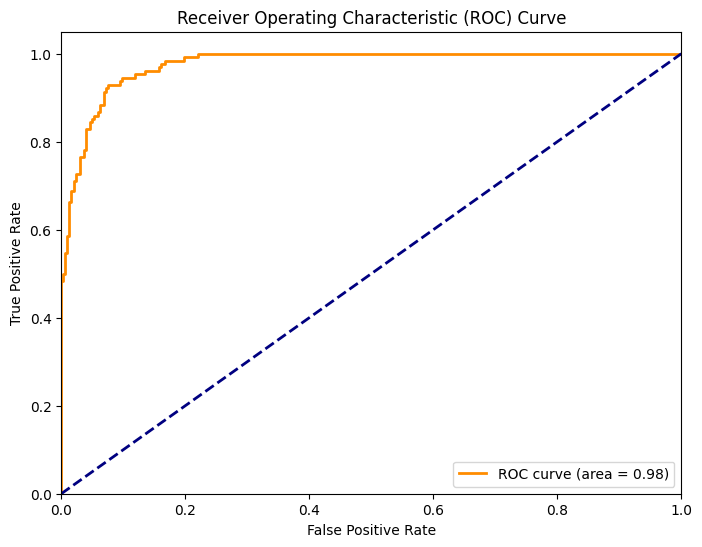

In [256]:
#with plot/graph of RUC curve
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

# Load the dataset
filename = 'C:/Users/user/Desktop/ITD105 Files/CaseStudy1/Datasets/car_evaluation_classification.csv'
dataframe = read_csv(filename)

# Custom mapping for each feature
buying_price_mapping = {'vhigh': 3, 'high': 2, 'med': 1, 'low': 0}
maintenance_cost_mapping = {'vhigh': 3, 'high': 2, 'med': 1, 'low': 0}
lug_boot_mapping = {'big': 2, 'med': 1, 'small': 0}
safety_mapping = {'high': 2, 'med': 1, 'low': 0}

# Apply the custom mapping to each column
dataframe['Buying Price'] = dataframe['Buying Price'].map(buying_price_mapping)
dataframe['Maintenance Cost'] = dataframe['Maintenance Cost'].map(maintenance_cost_mapping)
dataframe['Lug_Boot'] = dataframe['Lug_Boot'].map(lug_boot_mapping)
dataframe['Safety'] = dataframe['Safety'].map(safety_mapping)

# features (X) and target (Y)
X = dataframe[['Buying Price', 'Maintenance Cost', 'Number of Doors', 'Number of Persons', 'Lug_Boot', 'Safety']]
Y = dataframe['Classification']

# Split the dataset into a 75:25 train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=None)

# Train the data on a Logistic Regression model
model = LogisticRegression(max_iter=210)
model.fit(X_train, Y_train)

# Predict the probabilities for the test set
Y_prob = model.predict_proba(X_test)[:, 1]

# Calculate the ROC AUC score
roc_auc = roc_auc_score(Y_test, Y_prob)
print("AUC: %.3f" % roc_auc)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


### **4. Confusion Matrix**
---
* The **confusion matrix** is a handy presentation of the accuracy of a model with two or more classes. 
* The table presents predictions on the x-axis and accuracy outcomes on the y-axis. The cells of the table are the number of predictions made by a machine learning algorithm.

 <img src='https://drive.google.com/uc?export=view&id=1fog1cY4PUgs70l10uhK_0UWvwabfmzkj' width=480px>
 

Below is an example of calculating a confusion matrix for a set of predictions by a Logistic Regression on the Pima Indians onset of diabetes dataset.

[[375  25]
 [ 33 138]]


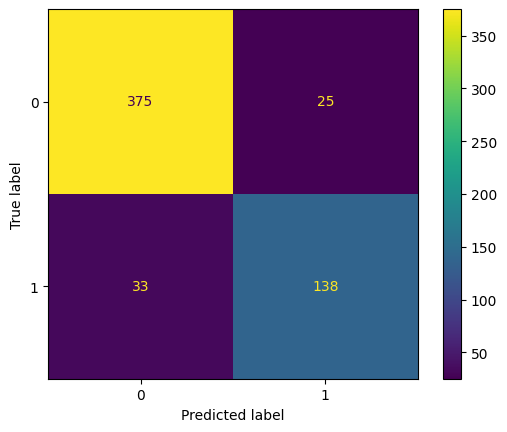

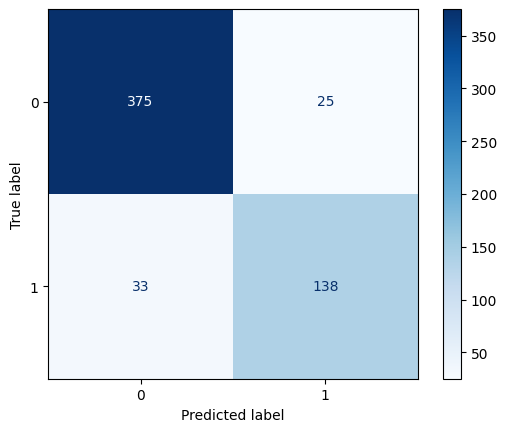

In [204]:
# Import necessary libraries
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the dataset
filename = 'C:/Users/user/Desktop/ITD105 Files/CaseStudy1/Datasets/car_evaluation_classification.csv'
dataframe = read_csv(filename)

# Custom mapping for each feature
buying_price_mapping = {'vhigh': 3, 'high': 2, 'med': 1, 'low': 0}
maintenance_cost_mapping = {'vhigh': 3, 'high': 2, 'med': 1, 'low': 0}
lug_boot_mapping = {'big': 2, 'med': 1, 'small': 0}
safety_mapping = {'high': 2, 'med': 1, 'low': 0}

# Apply the custom mapping to each column
dataframe['Buying Price'] = dataframe['Buying Price'].map(buying_price_mapping)
dataframe['Maintenance Cost'] = dataframe['Maintenance Cost'].map(maintenance_cost_mapping)
dataframe['Lug_Boot'] = dataframe['Lug_Boot'].map(lug_boot_mapping)
dataframe['Safety'] = dataframe['Safety'].map(safety_mapping)

# features (X) and target (Y)
X = dataframe[['Buying Price', 'Maintenance Cost', 'Number of Doors', 'Number of Persons', 'Lug_Boot', 'Safety']]
Y = dataframe['Classification']

# Split the dataset into train and test
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

# Train the data on a Logistic Regression model
model = LogisticRegression(max_iter=280)
model.fit(X_train, Y_train)

# Calculate confusion matrix for a set of predictions
predicted = model.predict(X_test)
matrix = confusion_matrix(Y_test, predicted)
print(matrix)

# Use ConfusionMatrixDisplay.from_estimator to plot the confusion matrix
disp = ConfusionMatrixDisplay.from_estimator(model, X_test, Y_test)
disp.plot(cmap=plt.cm.Blues)
plt.show()


_Although the array is printed without headings, you can see that the majority of the predictions fall on the diagonal line of the matrix (which are correct predictions)._


### **5. Classification Report**
---
* The scikit-learn library provides a convenience report when working on classification problems to give you a quick idea of the accuracy of a model using a number of measures. 
* The ```classification report()``` function displays the precision, recall, F1-score and support for each class.
Support is the number of actual occurrences of the class in the specified dataset. Imbalanced support in the training data may indicate structural weaknesses in the reported scores of the classifier and could indicate the need for stratified sampling or rebalancing.

The example below demonstrates the report on the binary classification problem.

In [205]:
# Cross Validation Classification Report
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Load the dataset
filename = 'C:/Users/user/Desktop/ITD105 Files/CaseStudy1/Datasets/car_evaluation_classification.csv'
dataframe = read_csv(filename)

# Custom mapping for each feature
buying_price_mapping = {'vhigh': 3, 'high': 2, 'med': 1, 'low': 0}
maintenance_cost_mapping = {'vhigh': 3, 'high': 2, 'med': 1, 'low': 0}
lug_boot_mapping = {'big': 2, 'med': 1, 'small': 0}
safety_mapping = {'high': 2, 'med': 1, 'low': 0}

# Apply the custom mapping to each column
dataframe['Buying Price'] = dataframe['Buying Price'].map(buying_price_mapping)
dataframe['Maintenance Cost'] = dataframe['Maintenance Cost'].map(maintenance_cost_mapping)
dataframe['Lug_Boot'] = dataframe['Lug_Boot'].map(lug_boot_mapping)
dataframe['Safety'] = dataframe['Safety'].map(safety_mapping)

# features (X) and target (Y)
X = dataframe[['Buying Price', 'Maintenance Cost', 'Number of Doors', 'Number of Persons', 'Lug_Boot', 'Safety']]
Y = dataframe['Classification']

# Split the dataset into train and test
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

# Train the data on a Logistic Regression model
model = LogisticRegression(max_iter=180)
model.fit(X_train, Y_train)

# Get classification report 
predicted = model.predict(X_test)
report = classification_report(Y_test, predicted)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       400
           1       0.85      0.81      0.83       171

    accuracy                           0.90       571
   macro avg       0.88      0.87      0.88       571
weighted avg       0.90      0.90      0.90       571



## B. Regression Metrics
In this section will review 3 of the most common metrics for evaluating predictions on regression
machine learning problems:
* Mean Absolute Error.
* Mean Squared Error.
* R2.


### **1. Mean Absolute Error**
---
* The **Mean Absolute Error** (or MAE) is the sum of the absolute differences between predictions and actual values. 
* It gives an idea of how wrong the predictions were. The measure gives an idea of the magnitude of the error, but no idea of the direction (e.g. over or under predicting). 

The example below demonstrates calculating mean absolute error on the Boston house price [dataset](https://www.kaggle.com/vikrishnan/boston-house-prices).

In [86]:
# Cross Validation Regression MAE
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Load the dataset
filename = 'D:/DataViz/BDA/housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataframe = read_csv(filename)
array = dataframe.values
X = array[:,0:13]
Y = array[:,13]

# Split the dataset into a 10-fold cross validation
kfold = KFold(n_splits=10, random_state=None)

# Train the data on a Linear Regression model
model = LinearRegression()

# Calculate the mean absolute error
scoring = 'neg_mean_absolute_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(("MAE: %.3f (%.3f)") % (results.mean(), results.std()))

ValueError: 
All the 10 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py", line 648, in fit
    X, y = self._validate_data(
  File "C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 565, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py", line 1122, in check_X_y
    y = _check_y(y, multi_output=multi_output, y_numeric=y_numeric, estimator=estimator)
  File "C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py", line 1147, in _check_y
    y = y.astype(np.float64)
ValueError: could not convert string to float: 'unacc'


In [87]:
#using train test split
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Load the dataset
filename = 'D:/DataViz/BDA/housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataframe = read_csv(filename)
array = dataframe.values
X = array[:, 0:13]
Y = array[:, 13]

# Split the dataset into a train set (80%) and a test set (20%)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train the data on a Linear Regression model
model = LinearRegression()
model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = model.predict(X_test)

# Calculate the Mean Absolute Error (MAE) on the test set
mae = -mean_absolute_error(Y_test, Y_pred)
print("MAE: %.3f" % mae)


ValueError: could not convert string to float: 'unacc'

A value of 0 indicates no error or perfect predictions. Like logloss, this metric is inverted by the cross val score() function.

### **2. Mean Squared Error**
---
* The **Mean Squared Error** (or MSE) is much like the mean absolute error in that it provides a gross idea of the magnitude of error. 
* Taking the square root of the mean squared error converts the units back to the original units of the output variable and can be meaningful for description and presentation. This is called the **Root Mean Squared Error** (or RMSE). 

The example below provides a demonstration of calculating mean squared error.

In [ ]:
# Cross Validation Regression MSE
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Load the dataset
filename = 'D:/DataViz/BDA/housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataframe = read_csv(filename)
array = dataframe.values
X = array[:,0:13]
Y = array[:,13]

# Split the dataset into a 10-fold cross validation
num_folds = 10
kfold = KFold(n_splits=10, random_state=None)

# Train the data on a Linear Regression model
model = LinearRegression()

# Caculate the mean squared error
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(("MSE: %.3f (%.3f)") % (results.mean(), results.std()))

In [ ]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the dataset
filename = 'D:/DataViz/BDA/housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataframe = read_csv(filename)
array = dataframe.values
X = array[:, 0:13]
Y = array[:, 13]

# Split the dataset into an 80:20 train-test split
test_size = 0.2
seed = 42  # Random seed for reproducibility
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

# Train the data on a Linear Regression model
model = LinearRegression()
model.fit(X_train, Y_train)

# Make predictions on the test data
Y_pred = model.predict(X_test)

# Calculate the mean squared error on the test set
mse = mean_squared_error(Y_test, Y_pred)
print("MSE: %.3f" % mse)


### **3. R2 Metric** 

* The **R2 (or R Squared) metric** provides an indication of the goodness of fit of a set of predictions to the actual values. 
* In statistical literature this measure is called the _coefficient of determination_. This is a value between 0 and 1 for no-fit and perfect fit respectively. 

The example below provides a demonstration of calculating the mean R2 for a set of predictions.

In [ ]:
# Cross Validation Regression R^2
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Load the dataset
filename = 'D:/DataViz/BDA/housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataframe = read_csv(filename)
array = dataframe.values
X = array[:,0:13]
Y = array[:,13]

# Split the dataset into a 10-fold cross validation
kfold = KFold(n_splits=10, random_state=None)

# Train the data on a Linear Regression model
model = LinearRegression()

# Calculate the R2 metric
scoring = 'r2'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(("R^2: %.3f (%.3f)") % (results.mean(), results.std()))

In [ ]:
#using train test split 80:20 ratio
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load the dataset
filename = 'D:/DataViz/BDA/housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataframe = read_csv(filename)
array = dataframe.values
X = array[:, 0:13]
Y = array[:, 13]

# Split the dataset into a 80:20 train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train the data on a Linear Regression model
model = LinearRegression()
model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = model.predict(X_test)

# Calculate the R-squared (R^2) metric on the test set
r2 = r2_score(Y_test, Y_pred)
print("R^2: %.3f" % r2)


# IV. Summary

In this notebook you discovered resampling techniques and performance metrics that you can use to evaluate your machine learning algorithms.

You learned four resampling techniques:
* Split into Train and Test Sets
* K-fold Cross Validation
* Leave One Out Cross Validation
* Repeated Random Test-Train Splits

You learned about three classification metrics: 
* Accuracy
* Logarithmic Loss
* Area Under ROC Curve 

You also learned about two convenience methods for classification prediction results: 
* Confusion Matrix 
* Classification Report 

Finally, you also learned about
three metrics for regression problems: 
* Mean Absolute Error
* Mean Squared Error 
* R2